In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd drive/MyDrive/IS4303/notebooks/new_cleaned

Mounted at /content/drive
/content/drive/MyDrive/IS4303/notebooks/new_cleaned


## Helpers

In [4]:
X_train = pd.read_csv('./5X_train.csv')
X_test = pd.read_csv('./4X_test.csv')
y_train = pd.read_csv('./5y_train.csv')
y_test = pd.read_csv('./4y_test.csv')
y_train = y_train['is_canceled']
y_test = y_test['is_canceled']

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, auc, precision_score, recall_score, f1_score
def plot_preds(preds, probas, truth):
  auc_score = roc_auc_score(truth, probas)
  prec = precision_score(truth, preds)
  rec = recall_score(truth, preds)
  f1 = f1_score(truth, preds)
  print(f"AUC: {auc_score:.2f}\n")
  print(f'Precision: {prec:.2f}')
  print(f'Recall: {rec:.2f}')
  print(f"F1: {f1:.2f}\n")

  fpr, tpr, thresholds = roc_curve(truth, probas)
  roc_auc = auc(fpr, tpr)
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('FPR')
  plt.ylabel('TPR')
  plt.title('ROC')
  plt.legend(loc="lower right")
  plt.show()

## Tuning and training

In [6]:
param_grid = {
  'criterion': ['gini', 'entropy'],
  'max_depth': [None, 3, 5, 10],
  'min_samples_split': [2, 3, 5, 10],
  'min_samples_leaf': [2, 4, 8],
  'max_features': [None, 'sqrt', 'log2']
}

dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 3, 5, 10],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 4, 8],
                         'min_samples_split': [2, 3, 5, 10]},
             scoring='f1')

In [7]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [8]:
params = grid_search.best_params_
clf = DecisionTreeClassifier(**params).fit(X_train, y_train)

AUC: 0.69

Precision: 0.53
Recall: 0.58
F1: 0.55



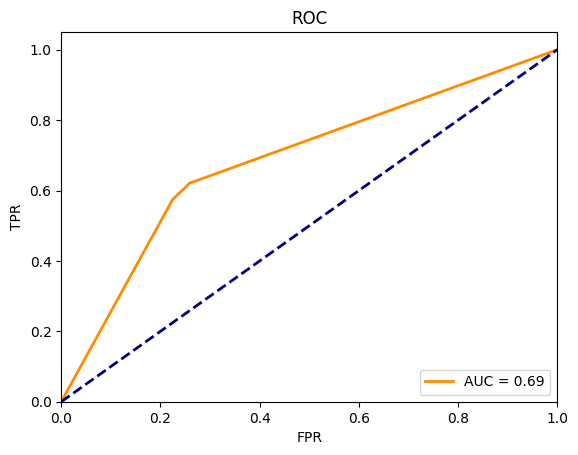

In [9]:
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:,1]
plot_preds(y_pred, y_pred_proba, y_test)